importing the important libaray!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


LOAD DATA

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
weather = pd.read_csv("wetter.csv")
kiwo = pd.read_csv("kiwo.csv")

print("Train:", train.shape)
print("Test:", test.shape)
print("Weather:", weather.shape)
print("KiWo:", kiwo.shape)


Train: (9334, 4)
Test: (1830, 3)
Weather: (2601, 5)
KiWo: (72, 2)


FIRST DATA INSPECTION

In [4]:
train.head(), test.head(), weather.head(), kiwo.head()


(        id       Datum  Warengruppe      Umsatz
 0  1307011  2013-07-01            1  148.828353
 1  1307021  2013-07-02            1  159.793757
 2  1307031  2013-07-03            1  111.885594
 3  1307041  2013-07-04            1  168.864941
 4  1307051  2013-07-05            1  171.280754,
         id       Datum  Warengruppe
 0  1808011  2018-08-01            1
 1  1808021  2018-08-02            1
 2  1808031  2018-08-03            1
 3  1808041  2018-08-04            1
 4  1808051  2018-08-05            1,
         Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
 0  2012-01-01         8.0      9.8250                   14        58.0
 1  2012-01-02         7.0      7.4375                   12         NaN
 2  2012-01-03         8.0      5.5375                   18        63.0
 3  2012-01-04         4.0      5.6875                   19        80.0
 4  2012-01-05         6.0      5.3000                   23        80.0,
         Datum  KielerWoche
 0  2012-06-16       

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9334 non-null   int64  
 1   Datum        9334 non-null   object 
 2   Warengruppe  9334 non-null   int64  
 3   Umsatz       9334 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 291.8+ KB


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                2601 non-null   object 
 1   Bewoelkung           2591 non-null   float64
 2   Temperatur           2601 non-null   float64
 3   Windgeschwindigkeit  2601 non-null   int64  
 4   Wettercode           1932 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 101.7+ KB


In [9]:

kiwo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datum        72 non-null     object
 1   KielerWoche  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


FIX DATE FORMATS

In [10]:
train["Datum"] = pd.to_datetime(train["Datum"])
test["Datum"] = pd.to_datetime(test["Datum"])
weather["Datum"] = pd.to_datetime(weather["Datum"])
kiwo["Datum"] = pd.to_datetime(kiwo["Datum"])


MISSING VALUE DIAGNOSTICS

In [11]:
print("Train Missing Values:\n", train.isna().sum())
print("\nWeather Missing Values:\n", weather.isna().sum())
print("\nKiwo Missing Values:\n", kiwo.isna().sum())


Train Missing Values:
 id             0
Datum          0
Warengruppe    0
Umsatz         0
dtype: int64

Weather Missing Values:
 Datum                    0
Bewoelkung              10
Temperatur               0
Windgeschwindigkeit      0
Wettercode             669
dtype: int64

Kiwo Missing Values:
 Datum          0
KielerWoche    0
dtype: int64


MERGE DATASETS INTO ONE MASTER TABLE

In [12]:
df = pd.merge(train, weather, on="Datum", how="left")
df = pd.merge(df, kiwo, on="Datum", how="left")

print(df.shape)
df.head()


(9334, 9)


,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN


TARGET VARIABLE ANALYSIS (UMSATZ DISTRIBUTION)

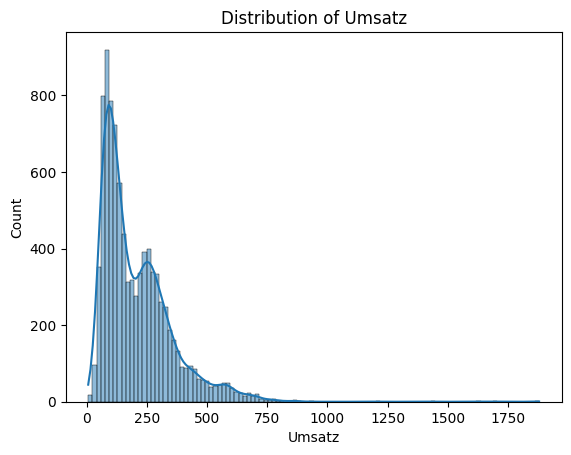

In [13]:
plt.figure()
sns.histplot(df["Umsatz"], kde=True)
plt.title("Distribution of Umsatz")
plt.show()


. BASIC STATISTICAL SUMMARY

In [14]:
df.describe()


,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
count,9.334000e+03,9334,9334.000000,9334.000000,9264.000000,9318.000000,9318.000000,7009.000000,223.0
mean,1.559311e+06,2016-01-13 23:56:27.100921344,3.088172,206.749044,4.720747,12.028483,10.974780,36.900128,1.0
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,0.000000,-8.475000,3.000000,0.000000,1.0
25%,1.410123e+06,2014-10-12 00:00:00,2.000000,96.897441,3.000000,6.237500,8.000000,10.000000,1.0
50%,1.601102e+06,2016-01-10 00:00:00,3.000000,161.900831,6.000000,11.625000,10.000000,28.000000,1.0
75%,1.704223e+06,2017-04-22 00:00:00,4.000000,280.644663,7.000000,17.962500,13.000000,61.000000,1.0
max,1.807315e+06,2018-07-31 00:00:00,6.000000,1879.461831,8.000000,31.437500,35.000000,95.000000,1.0
std,1.512503e+05,NaN,1.489002,144.545189,2.646273,7.232829,4.131974,27.095884,0.0


FEATURE ENGINEERING FOR EDA (TIME SIGNALS)

In [15]:
df["Weekday"] = df["Datum"].dt.dayofweek   # 0 = Monday
df["Month"] = df["Datum"].dt.month
df["Year"] = df["Datum"].dt.year


. SALES VS TIME (TREND CHECK)

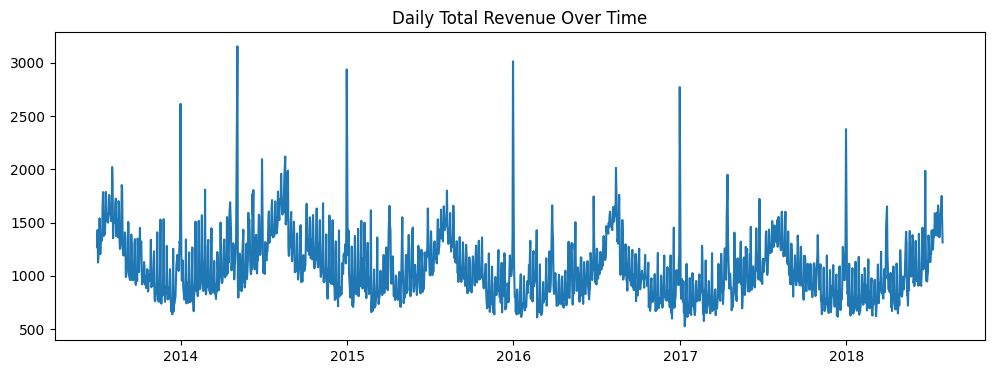

In [16]:
daily_sales = df.groupby("Datum")["Umsatz"].sum()

plt.figure(figsize=(12,4))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Total Revenue Over Time")
plt.show()


WEATHER IMPACT QUICK-CHECK (CORE MULTIVARIATE SIGNALS)

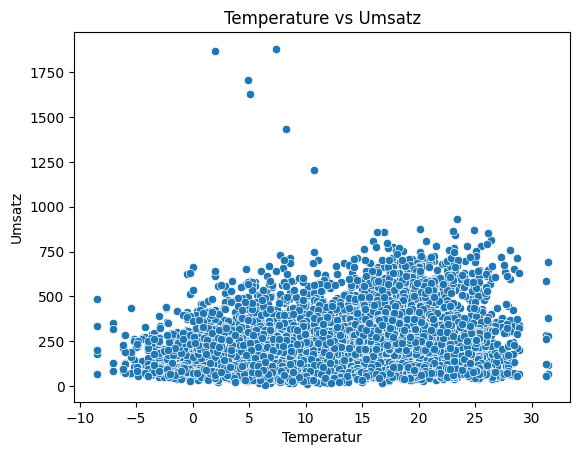

In [17]:
sns.scatterplot(data=df, x="Temperatur", y="Umsatz")
plt.title("Temperature vs Umsatz")
plt.show()


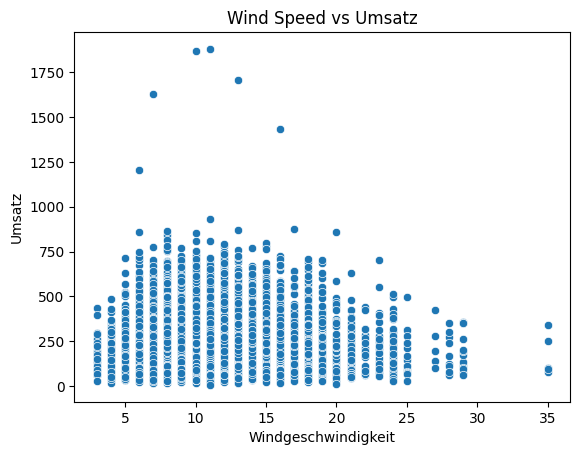

In [18]:
sns.scatterplot(data=df, x="Windgeschwindigkeit", y="Umsatz")
plt.title("Wind Speed vs Umsatz")
plt.show()


CORRELATION MATRIX (MULTIVARIATE FOUNDATION)

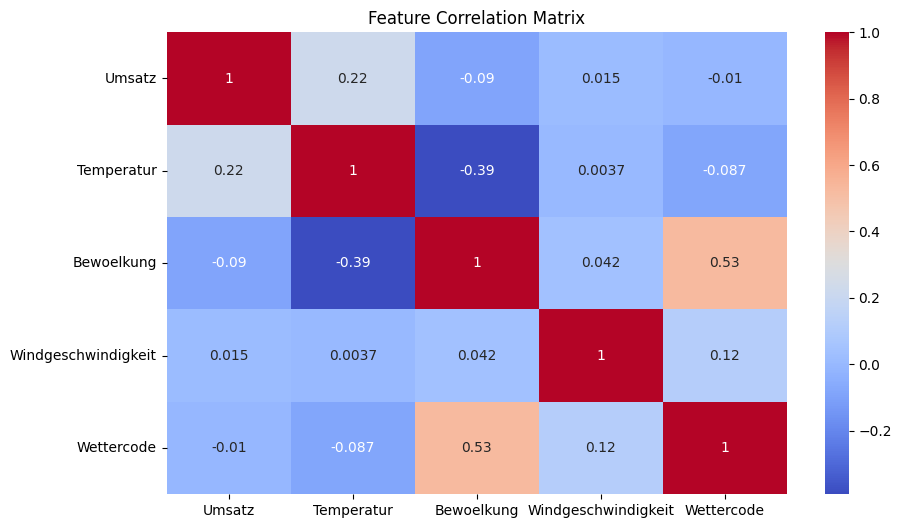

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[["Umsatz", "Temperatur", "Bewoelkung", "Windgeschwindigkeit", "Wettercode"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix")
plt.show()


WEEKDAY SALES PATTERN (RETAIL SEASONALITY)

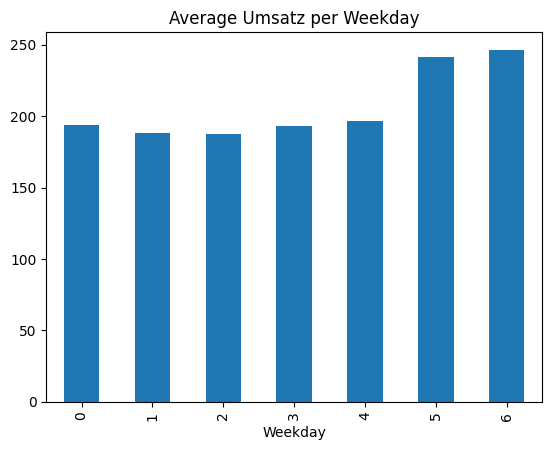

In [20]:
weekday_sales = df.groupby("Weekday")["Umsatz"].mean()

plt.figure()
weekday_sales.plot(kind="bar")
plt.title("Average Umsatz per Weekday")
plt.show()
